### Regreeão Linear aplicada

- O Objetivo e aplicar todos os conceitos de Tratamento da Base, Visualização de Dados, mecanismos de correlação dos dados, Regressão Lienar, Predição e avaliação do modelo. 

#### Conhecendo os Dados

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
base_full = pd.read_excel('C:\\Users\\flavi\\Google Drive\\Estudos\\Formação em Data Science\\Regressão\\Implementações\\Bases\\Vendas.xlsx')
base_full.head(5)

Sales   Taxas
0   25.9  4.9176
1   29.5  5.0208
2   27.9  4.5429
3   25.9  4.5573
4   29.9  5.0597

#### Dicionário das Colunas

- Sales: Vendas
- Output variable (based on sensory data):
- Taxas: Valor da Taxa Cobrada


In [3]:
base_full.describe()

Sales      Taxas
count  24.00000  24.000000
mean   34.61250   6.404917
std     6.00379   1.582007
min    25.90000   3.891000
25%    29.90000   5.057275
50%    33.70000   5.974300
75%    38.15000   7.873075
max    45.80000   9.141600

In [4]:
base_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   24 non-null     float64
 1   Taxas   24 non-null     float64
dtypes: float64(2)
memory usage: 512.0 bytes


In [5]:
base_full.isnull().sum()

Sales    0
Taxas    0
dtype: int64

<AxesSubplot:xlabel='Sales', ylabel='count'>

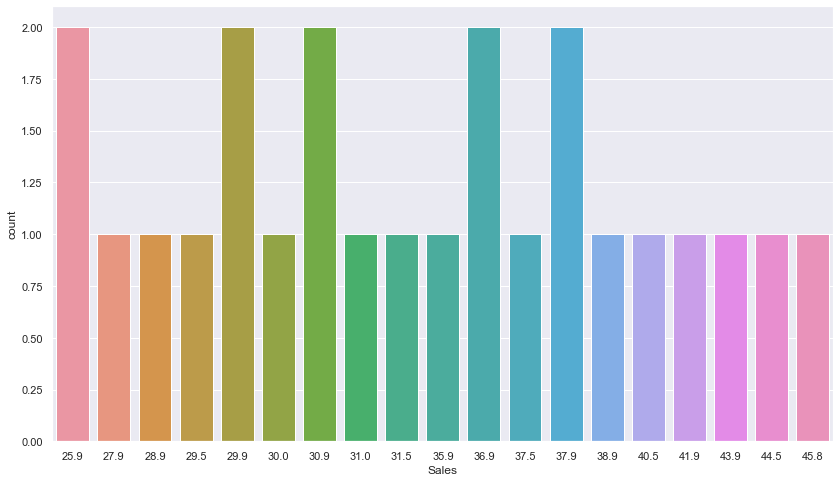

In [6]:
sns.set(rc={'figure.figsize':(14, 8)})
sns.countplot(base_full['Sales'])

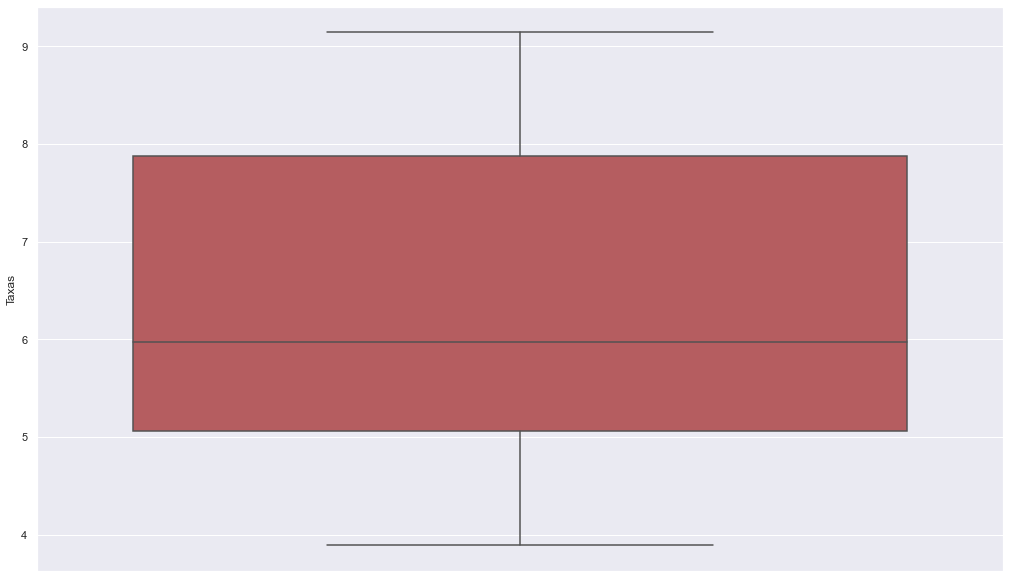

In [7]:
sns.boxplot(y='Taxas', data=base_full, color='r')
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<AxesSubplot:title={'center':'Distribuição de Frequências de Taxas'}, xlabel='Traxas', ylabel='Frequência'>

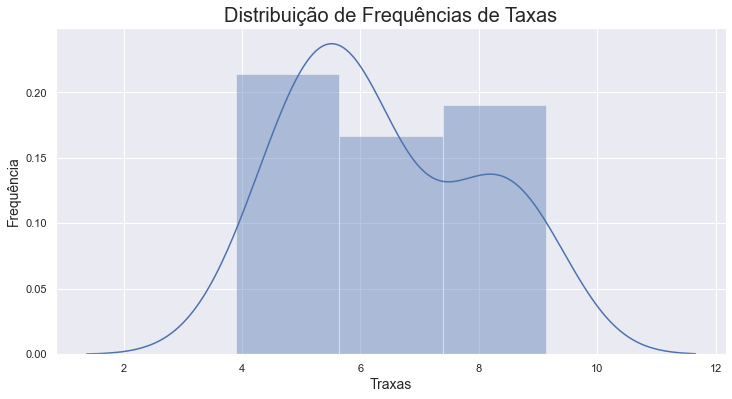

In [8]:
# plotando um histograma para a variável 'consumo'
ax = sns.distplot(base_full['Taxas'])
# fazendo formatações
ax.figure.set_size_inches(12,6)
# adicionando um título ao nosso gráfico
ax.set_title('Distribuição de Frequências de Taxas', fontsize=20)
# identificando os eixos
ax.set_xlabel('Traxas', fontsize=14)
ax.set_ylabel('Frequência', fontsize=14)
ax

### Correlação: 
- Os coeficientes de correlação são métodos estatísticos para se medir as relações entre variáveis e o que elas representam. O que a correlação procura entender é como uma variável se comporta em um cenário onde outra está variando, visando identificar se existe alguma relação entre a variabilidade de ambas. Embora não implique em causalidade, o coeficiente de correlação exprime em números essa relação, ou seja, quantifica a relação entre as variáveis.

#### Correlação de Pearson
-  É um grau de relação entre duas variáveis quantitativas e exprime o grau de correlação através de valores situados entre -1 e 1. Um coeficiente de correlação próximo de zero indica que não há relação entre as duas variáveis, e quanto mais eles se aproximam de 1 ou  -1, mais forte é a relação.

<img src=".../imagens/range-correlacao.png" alt="Range Correlacao" width="500"/>
<p style="text-align:center">Figura 01 - Range de correlação de Variáveis.</p>

<img src=".../imagens/correlacao.jpg" alt="Equação de Pearson" width="500"/>
<p style="text-align:center">Figura 02 - Equação de Pearson,onde xi e yi (barrados) são as médias das variáveis e Xi e Yi as amostras.</p>


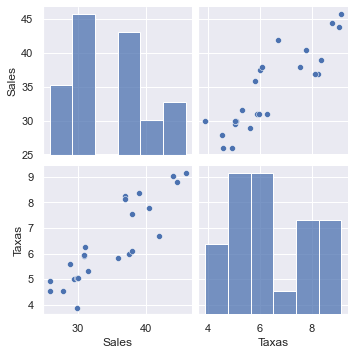

In [9]:
sns.pairplot(base_full)

In [10]:
'''ax = sns.pairplot(base_full, y_vars='Taxas', x_vars=['Sales'], 
                  kind='reg', plot_kws={'line_kws':{'color':'purple'}})
# incluindo o título
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1)'''

"ax = sns.pairplot(base_full, y_vars='Taxas', x_vars=['Sales'], \n                  kind='reg', plot_kws={'line_kws':{'color':'purple'}})\n# incluindo o título\nax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1)"

<AxesSubplot:>

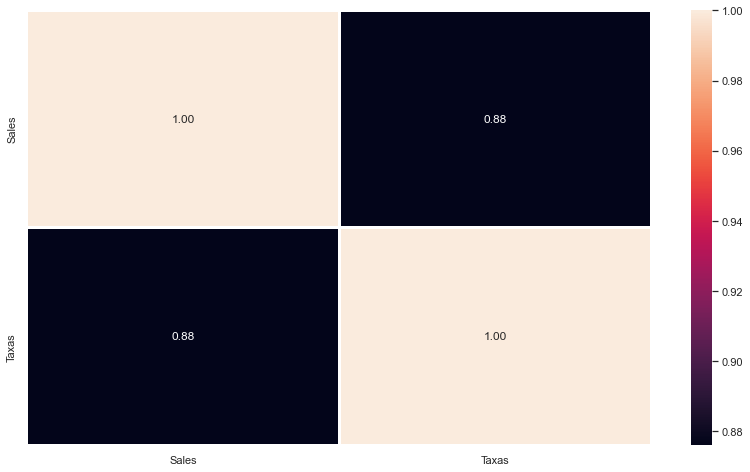

In [11]:
sns.heatmap(base_full.corr(), annot=True, fmt='.2f', linewidths=2)

### Analisando a variável Objetivo qualidade podemos:
- Existe uma correlação entre as váriaveis Taxas e Vendas. Essa correlação é dada como uma correlação moderada para forte conforme a escala de correlação. Neste caso não existe correlações fortes negativas, apenas positivas.

In [12]:
base_full.corr()["Taxas"].sort_values(ascending=False)

Taxas    1.000000
Sales    0.875976
Name: Taxas, dtype: float64

#### Calculando a correlação manualmente

In [13]:
from scipy.stats import pearsonr
def get_correlation(column1, column2, df):
    pearson_corr, p_value = pearsonr(df[column1], df[column2])
    print("Correlação entre {} e {} é de  {}".format(column1,column2, pearson_corr))
    print("P-value dessa correlação é de  {}".format(p_value))

In [14]:
get_correlation('Sales','Taxas', base_full)

Correlação entre Sales e Taxas é de  0.8759762404044993
P-value dessa correlação é de  2.051257468209524e-08


### Atibutos escolidos
Dessa forma, vamos escolher as variáveis:
- variável dependente (Y): Taxas
<br />
- variáveis auxiliares (X) que explicarão a dependente (Y):Sales

Em resumo, em modelos de regressão linear é importante:
- Verificarmos se as variáveis explicativas (X’s) têm forte correlação com a variável dependente (Y).
- Que as variáveis explicativas (X’s) não tenham forte correlação entre si.

In [15]:
df_menor = base_full
df_menor.head()

Sales   Taxas
0   25.9  4.9176
1   29.5  5.0208
2   27.9  4.5429
3   25.9  4.5573
4   29.9  5.0597

In [16]:
# Separando os fatores/previsores da resposta/target:
X = df_menor.iloc[:, 0].values.reshape(-1,1)
y = df_menor.iloc[:, 1].values.reshape(-1,1)
# IMPORTANTE! Tive que fazer um reshape nos valores de x e y, devido a necessidades da biblioteca.

<img src="../imagens/linearRegression_introduction.png" alt="Linear Regression" width="500"/>
<p style="text-align:center">Figura 03 - Esquema explicativo para regressão linear simples com uma variável dependente e uma independente.</p>
<p style="text-align:center">Fonte: Curso do Prof. Granatyr</p>

Os problemas de regressão linear simples e polinomial são problemas de ajuste dos parâmetros. No caso acima citado, os parâmetros são:

$$
\beta_{0}: Intercepto
$$

$$
\beta_{1}: Coeficiente
$$

Para o ajuste dos parâmetros, é usado normalmente a **descida do gradiente (gradient descent)** por se tratar de um método numérico menos custoso que a aplicação da pseudo-inversa. Este último por sua vez, tem um custo computacional elevado pois necessita da inversão de matrizes.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [18]:
X_train.shape,X_test.shape, len(y_train), len(y_test)


((16, 1), (8, 1), 16, 8)

In [19]:
#Treinando o Modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [20]:
print("Intercepto = {:.3f}".format(regressor.intercept_[0]))
print("Coeficiente = {:.3f}".format(regressor.coef_[0][0]))

Intercepto = -2.299
Coeficiente = 0.251


Dessa Forma a Equação é : 
    
    Y = -2.299 + 0.251* X

In [21]:
reta_x = np.linspace(min(X)-5, max(X)+5,100).reshape(-1,1)
reta_y = regressor.predict(reta_x)
reta_df = np.concatenate((reta_x, reta_y), axis=1)
reta_df = pd.DataFrame(reta_df, columns=("x_sales", "y_taxas"))

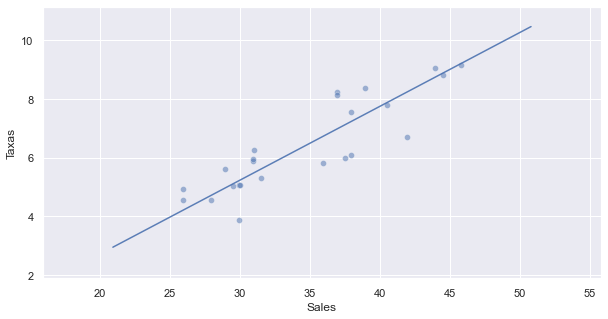

In [22]:
sns.set()
dimensoes = (10,5)
fig, ax = plt.subplots(figsize=dimensoes)
ax.set(xlim = (min(X)-10, max(X)+10),ylim=(min(y)-2, max(y)+2))
ax = sns.scatterplot(x="Sales", y="Taxas", data=df_menor, alpha=0.5);
ax = sns.lineplot(x="x_sales", y="y_taxas", data=reta_df, alpha=0.9, palette="blue");

### Erro Quadrático
Erro quadrático penalisa exponencialmente mais os erros. Assim, erros grande são muito piores que erros pequenos. Uma desvantágem é que a escala do erro quadrático é o quadrado da escala do target, fazendo com que a interpretação seja difícil.

### Erro Absoluto
O erro absoluto é na mesma escala do target, tendo interpretação fácil. Ele pondera linearmente erros maiores e por isso é mais robusto a outliers.

### Raíz Quadrada do Erro Quadrático
Mesmas vantagens e desvantagens do erro quadrático com a vantágem adicional de ser mais fácil de interpretar. A escolha entre esse erro e o erro absoluto vai do quanto você quer penalizar erros maiores. 

![img](https://matheusfacure.github.io/img/tutorial/cost-median-mean.png)

### $R^2$
O $R^2$ é uma métrica entre zero e um e é fácilmente interpretável como a explicação da variância do target pelo modelo. O $R^2$ também nos dá quão melhor estamos a partir da média (benchmark inicial). Porém, não é fácil saber a magnitude dos erros só pelo $R^2$.


 ### Avaliando os resultdados do modelo
 - R2: Coeficiente de Determinação, explica o quanto o modelo criado consegue explicar os valores de uma predição. Vai de 0 a 1 e quanto mais proximo de 1 mais explicativo é o modelo. 
 - MSE: Avalise de Residuais do Modelo de forma quadrática, quanto menor e o seu valor melhor, entretanto muito proximo a zero pode caracterizar um overfiting
 - ASE: Avalise de Residuais do Modelo de forma absoluta, quanto menor e o seu valor melhor, entretanto muito proximo a zero pode caracterizar um overfiting, diferença do anterior é a não penalização de valores discrepantes e outliers
 - RMSE: Semelhante ao MSE porém aqui é obtida a raiz, exponencializando mais ainda autliers e aumentando ainda mais o valor dos residuais.
 

In [23]:

print('R² com treinamento = {}'.format(regressor.score(X_train, y_train).round(2)))
print('R² com teste = %s' % r2_score(y_test, y_pred).round(2))
print("MSE: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("RMSE: {:.3f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("MAE: {:.3f}".format(mean_absolute_error(y_test, y_pred)))
# print("MAPE:, ", mean_absolute_percentage_error(y_test, y_pred))
print("R2: {:.3f}".format(r2_score(y_test, y_pred)))

################################################################################
# Cálculo do R2 ajustado:
def r2_ajustado(x, y, y_pred):
    """
    r2_ajustado retorna o R² Ajustado e recebe como argumento as séries com o
    valor alvo teste e o predito.
    """
    n = X_train.shape[0]
    k = X_train.shape[1]
    return (1-((n-1)/(n-(k+1)))*(1-r2_score(y, y_pred)))
################################################################################

print("R2 Ajustado: {:.3}".format(r2_ajustado(X_test, y_test, y_pred)))

R² com treinamento = 0.76
R² com teste = 0.49
MSE: 0.429
RMSE: 0.655
MAE: 0.582
R2: 0.490
R2 Ajustado: 0.454


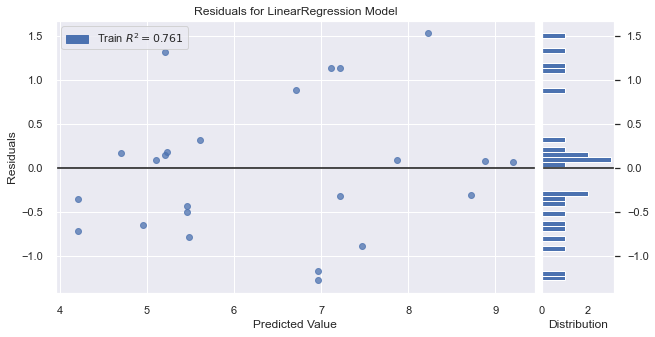

In [24]:
from yellowbrick.regressor import ResidualsPlot

sns.set()
dimensoes = (10,5)
fig, ax = plt.subplots(figsize=dimensoes)

visualizador = ResidualsPlot(regressor)
visualizador.fit(X, y)
visualizador.poof();

In [25]:
Y = -2.299 + 0.251* 26
Y = regressor.intercept_[0] + regressor.coef_[0]*26
Y

array([4.23003111])

In [26]:
y_pred = regressor.predict([[26]])
y_pred

array([[4.23003111]])

#### Resumo Sistemático ###

- A partir dos dados foi possivel criar uma equação com os valores de cada um parâmetos $beta_{0}: Intercepto$ e $beta_{1}: Coeficiente$ capaz de estimar/predizer os valores de taxas a serem cobradas.
<br />
- No conjunto de dados não existem outliers significativos, entretanto observando a faixa de regressão do modelo, entendemos que a sua caracteristica de resposta em torno de 79% para a base de treino e 49% para a base de teste limita-se a valores dentro da distância interquartil. Casos extremos são necessários amostras de dados mais completas.
<br />
- Tal incomplitude de dados pode resultar em uma má avaliação da distribuição, ou seja, talvez a quantidade de dados é insuficiente para explicar as distribuições, seja dos dados ou dos seus ruidos, conforme mostrado nos gráficos. 
<br />
- Podemos avaliar se esse modelo de dados consegue ser melhor explicado utilizando algum tipo de regularização, melhorando sua variância e viés;

#### Próximos passos ###
- Analisar teste e treino(formas de fatiar os dados) e validações cruzadas, se melhoram os resultados do modelo
<br />
- Avaliar se implementando um Lasso podemos melhorar os resultados

In [27]:
# Utilizando kfold como metodo de split dos dados

In [28]:
regressor_2 = LinearRegression()
regressor_2.fit(X_train, y_train)

LinearRegression()

In [29]:
import math
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor_2, X, y, cv=3, scoring='neg_mean_squared_error')
print("RMSE: ",math.sqrt(-scores.mean()))
print("MSE: ",(-scores.mean()))

RMSE:  0.8245495654939765
MSE:  0.6798819859563054
